Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  33%|███▎      | 1/3 [00:00<00:00,  9.19it/s]An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet.
Defaulting to unsafe serialization. Pass `allow_pickl

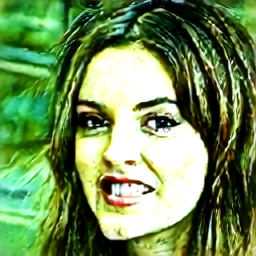

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from diffusers import LDMPipeline
import torch

# Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = LDMPipeline.from_pretrained("CompVis/ldm-celebahq-256").to(device)

# Generate image
image = pipeline(num_inference_steps=50).images[0]

# Save or display
image  # Display image in notebook

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--ldm-celebahq-256/snapshots/03978f22272a3c2502da709c3940e227c9714bdd/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|████


=== num_inference_steps = 50 ===


100%|██████████| 50/50 [00:00<00:00, 50.51it/s]


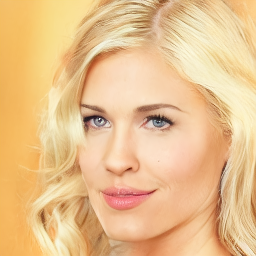


=== num_inference_steps = 200 ===


100%|██████████| 200/200 [00:04<00:00, 49.95it/s]


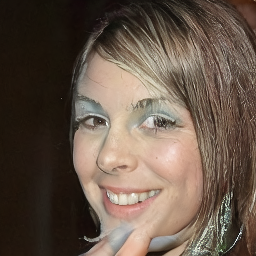


=== num_inference_steps = 500 ===


100%|██████████| 500/500 [00:09<00:00, 50.15it/s]


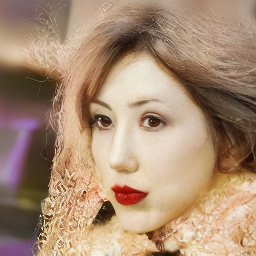


=== num_inference_steps = 1000 ===


100%|██████████| 1000/1000 [00:19<00:00, 50.44it/s]


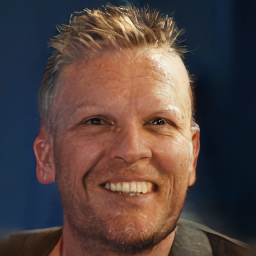

In [ ]:
from diffusers import LDMPipeline
import torch
from IPython.display import display

pipeline = LDMPipeline.from_pretrained("CompVis/ldm-celebahq-256").to("cuda")

# Key fix: Force scaling factor to 1.0
if hasattr(pipeline, "vae"):
    pipeline.vae.config.scaling_factor = 1.0
elif hasattr(pipeline, "vqvae"):
    pipeline.vqvae.config.scaling_factor = 1.0

# Generate images with different inference steps
steps_list = [50, 200, 500, 1000]

for steps in steps_list:
    print(f"\n=== num_inference_steps = {steps} ===")
    image = pipeline(num_inference_steps=steps).images[0]
    display(image)
    image.save(f"generated_face_steps_{steps}.png")